# Actividad 1 Algoritmos geneticos

TO-DO:
- Agregar el problema
- Agregar las instrucciones y datos iniciales y concidos del problema

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from my_lib.utility import normalizar, desnormalizar,binarizar,bin_to_dec,generar_poblacion, get_espacio_matriz,ordenar_poblacion,cruzar_individuos,buscar_individuo

## Codificar el dominio de la solucion

In [2]:
# Establecer el conjunto solucion
espacio_busqueda_src = np.linspace(-1,1,64)

# Establecer la funcion costo
def costo (x):
    return x**2

### Mostrar graficamente el conjunto solucion

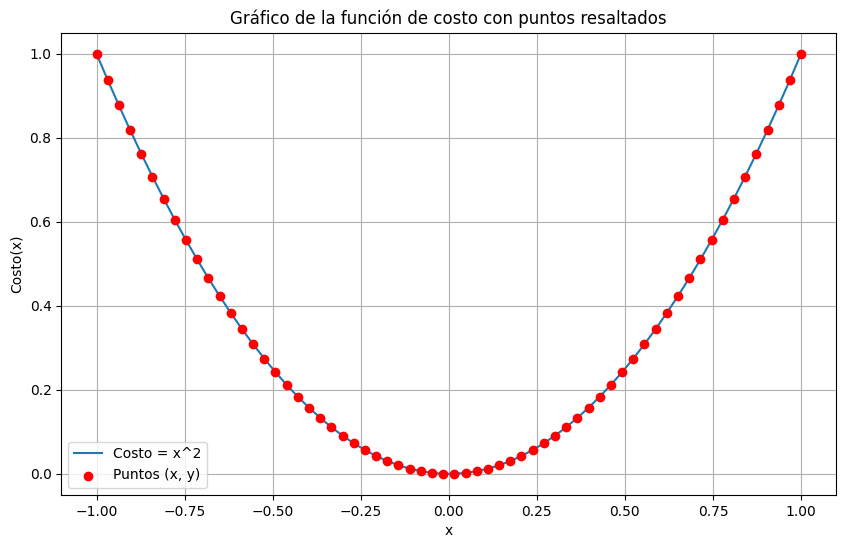

In [3]:
# Evaluar la función de costo para cada valor en conjunto_solucion
valores_costo = costo(espacio_busqueda_src)

# Establecer el tamaño de la gráfica
plt.figure(figsize=(10, 6))  # 10 pulgadas de ancho, 6 pulgadas de alto

# Graficar la función de costo
plt.plot(espacio_busqueda_src, valores_costo, label='Costo = x^2')

# Resaltar los puntos x,y en la gráfica con scatter
plt.scatter(espacio_busqueda_src, valores_costo, color='red', label='Puntos (x, y)', zorder=5)

# Añadir etiquetas y leyendas
plt.xlabel('x')
plt.ylabel('Costo(x)')
plt.title('Gráfico de la función de costo con puntos resaltados')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Codificacion del dominio

In [4]:
# Normalizar espacio de busqueda en valores de [0,63]
espacio_busqueda_norm = normalizar(espacio_busqueda_src,
                                   0,
                                   63)

#Codificar a binario el espacio de busqueda
espacio_busqueda_bin = binarizar(nbites=6,
                                 datos=espacio_busqueda_norm)

In [5]:
espacio_busqueda = np.zeros((espacio_busqueda_src.shape[0],4),dtype=object)

espacio_busqueda[:,0] = espacio_busqueda_src

espacio_busqueda[:,1] = np.round(espacio_busqueda_norm, decimals=0)

espacio_busqueda [:,2] = espacio_busqueda_bin

espacio_busqueda [:,3] = [costo(x) for x in espacio_busqueda_src]

print(espacio_busqueda)

[[-1.0 0.0 '000000' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [-0.9365079365079365 2.0 '000010' 0.8770471151423532]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [-0.8412698412698413 5.0 '000101' 0.7077349458301839]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [-0.746031746031746 8.0 '001000' 0.5565633660871756]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [-0.6825396825396826 10.0 '001010' 0.46586041824137064]
 [-0.6507936507936508 11.0 '001011' 0.4235323759133283]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [-0.46031746031746035 17.0 '010001' 0.2118921642731167]
 [-0.4285714285714286 18.0 '010010'

## Generar poblacion aleatoria

In [6]:
#Generar una poblacion inicial aleatoria de 10 individuos
poblacion = generar_poblacion(espacio_busqueda,10)
print(poblacion)

[[0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]]


## Ordenar la poblacion

In [7]:
# Se ordena la población de mayor a menor aptitud
pob_ord = ordenar_poblacion(poblacion)
print(pob_ord)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]]


### Guardar generacion

In [8]:
GENERACIONES = np.array([pob_ord])
GEN_CRIT = 10
#GENERACIONES = np.vstack([GENERACIONES,[pob_ord]])
N_GEN = len(GENERACIONES)

To do:
* 1 métodos elitista 
* 2 métodos de selección
* 2 métodos de cruza y su justificación
* método de paro --->epsilon con un umbral y for 

## Cruzar primera generacion

#### Métodos de cruza

In [9]:
def un_corte(n_cromos,padre,madre): 
    # división de padre y madre en dos mitades
    cromos_p = np.array([padre[:int(n_cromos/2)], 
                         padre[-int(n_cromos/2):]])
    cromos_m = np.array([madre[:int(n_cromos/2)],
                         madre[-int(n_cromos/2):]])
    
    hijo1 = f'{cromos_m[0]}{cromos_p[1]}'
    hijo2 = f'{cromos_p[0]}{cromos_m[1]}'
    
    #print([hijo1,hijo2])
    return hijo1, hijo2

def dos_cortes(n_cromos,padre,madre):
    # división de padre y madre en tres partes
    ter1 = int(n_cromos/3)
    ter2 = ter1*2

    cromos_p = np.array([padre[:ter1], 
                         padre[ter1:ter2], 
                         padre[ter2:]])
    
    cromos_m = np.array([madre[:ter1], 
                         madre[ter1:ter2], 
                         madre[ter2:]])
    
    hijo1 = f'{cromos_m[0]}{cromos_p[1]}{cromos_m[2]}'
    hijo2 = f'{cromos_p[0]}{cromos_m[1]}{cromos_p[2]}'
    #print([hijo1,hijo2])
    return hijo1,hijo2 

def cruza_homogenea(n_cromos,padre,madre):
    hijo1 = []
    hijo2 = []
    for j in range(n_cromos):
        #selecciona de forma aleatoria de que padre/madre proviene el bit para cada hijo
        if random.random() < 0.5: # 50% de probabilidad
            hijo1.append(padre[j])
            hijo2.append(madre[j])
        else:
            hijo1.append(madre[j])
            hijo2.append(padre[j])
    
    # Convertir las listas de bits a cadenas
    hijo1 = ''.join(hijo1)
    hijo2 = ''.join(hijo2)
    #print([hijo1,hijo2])
    return (hijo1,hijo2)

#### Métodos de selección

In [10]:
def rank(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])

    nueva_pob = pob.copy()
    for i in range(0,n,2):
        padre = pob[i,2]
        madre = pob[i+1,2]
        #print(f"Hijos de {padre} y {madre}")
        
        # se cambia el tipo de cruza que se quiera emplear 
        aux_1,aux_2 = un_corte(n_cromos,padre,madre)
        # hijo1,hijo2 = dos_cortes(n_cromos,padre,madre)
        # hijo1,hijo2 = cruza_homogenea(n_cromos,padre,madre)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])
    return nueva_pob

def ale_monogamico(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])
    # índices de los individuos 
    indice = list(range(n))
    # lista de índices monogámico de forma aleatoria
    random.shuffle(indice)
    nueva_pob = pob.copy()
    for i in range(0,n,2):
        # selección de índices consecutivos para un par de padres y asegura que no se repita la selección
        padre = indice[i]
        madre = indice[i+1]

        padre_m = pob_ord[padre,2]
        madre_m = pob_ord[madre,2]

        #print(f"Hijos de {padre_m} y {madre_m}")

        #hm = un_corte(n_cromos, padre_m,madre_m)
        aux_1,aux_2 = dos_cortes(n_cromos,padre_m,madre_m)
        #hm = cruza_homogenea(n_cromos,padre_m,madre_m)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])

    return nueva_pob

def ale_poligamico(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])
    # número de crices a realizar 
    n_cruces = 5
    # n_cruces = n/2
    nueva_pob = pob.copy()
    for i in range(n_cruces):
        # selección de índices consecutivos para un par de padres y asegura que no se repita la selección
        padre = random.randint(0,n-1)
        madre = random.randint(0,n-1)

        padre_p = pob_ord[padre,2]
        madre_p = pob_ord[madre,2]

        #print(f"Hijos de {padre_p} y {madre_p}")

        #hp = un_corte(n_cromos, padre_p, madre_p)
        #hp = dos_cortes(n_cromos,padre_p,madre_p)
        aux_1,aux_2 = cruza_homogenea(n_cromos,padre_p,madre_p)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])

    return nueva_pob


1) Rank

In [11]:
rank_gen = rank(pob_ord,espacio_busqueda)
print(rank_gen)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.9682539682539681 62.0 '111110' 0.9375157470395563]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.4920634920634921 47.0 '101111' 0.24212648022171834]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.04761904761904767 30.0 '011110' 0.0022675736961451295]
 [-0.46031746031746035 17.0 '010001' 0.211892

2) Aleatorio monogámico

In [14]:
monogamico_gen = ale_monogamico(pob_ord,espacio_busqueda)
print(monogamico_gen)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.04761904761904767 30.0 '011110' 0.0022675736961451295]
 [0.8412698412698412 58.0 '111010' 0.7077349458301837]
 [-0.33333333333333337 21.0 '010101' 0.11

3) Aleatorio poligámico

In [15]:

poligamico_gen = ale_poligamico(pob_ord,espacio_busqueda)
print(poligamico_gen)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [0.20634920634920628 38.0 '100110' 0.04257999496094732]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.11111111111111116 28.0 '011100' 0.0

#### promedio de diferentes métodos de cruza de individuos

In [16]:
costos = [rank_gen[:,3],monogamico_gen[:,3],poligamico_gen[:,3]]
nombres = ['rank', 'A. monogámico', 'A. poligámico'] 

for nombre,i in zip(nombres,costos):
    costo_promedio = np.mean(i)
    print(f'costo promedio de {nombre} = {costo_promedio}')

costo promedio de rank = 0.3148904006046863
costo promedio de A. monogámico = 0.27256235827664393
costo promedio de A. poligámico = 0.2745779793398841


### Mutación

In [17]:
def mutacion(individuo):
    """
    Mutación que cambia un bit aleatorio de cada individuo,
    cambiando el 0 por 1.
    """
    # convertir el individuo binario a una lista de bits
    bits = list(individuo)
    # seleccionar un índice aleatorio para mutar 
    index = random.randint(0,5)

    #mutar el bit en el índice seleccionado
    if bits[index] == '0':
        bits[index] = '1'
    else:
        bits[index] = '0'

    # convertir la lista de bits de vuelta a una cadena binaria
    individuo_mutado = ''.join(bits)

    return individuo_mutado

### Ordenar por aptitud para poder seleccionar los más aptos

In [18]:
new_age = poligamico_gen
print(new_age)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [0.20634920634920628 38.0 '100110' 0.04257999496094732]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.11111111111111116 28.0 '011100' 0.0

In [19]:
new_age_ord = ordenar_poblacion(new_age)
print(new_age_ord)

[[0.9365079365079363 61.0 '111101' 0.8770471151423528]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.20634920634920628 38.0 '100110' 0.04257999496094732]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.11111111111111116 28.0 '011100' 0.01234567901234569]
 [-0.04761904761904767 30.0 '011110' 0.0022675736

función para el criterio de paro con epsilon

In [20]:
def seleccionar_padres(pob,num_padres):
    # selecciona los primeros 10 individuos
    nueva_pob = pob.copy()
    # ordena la población en orden descendente (maximizando)
    nueva_pob_ord = ordenar_poblacion(pob)
    # padres más optimos
    padres = nueva_pob_ord[:num_padres]
    return padres

In [21]:
padres = seleccionar_padres(new_age_ord,10)
print(padres)

[[0.9365079365079363 61.0 '111101' 0.8770471151423528]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]]


In [37]:
# función para detener la evolución de la población, es decir, cuando ha alcazado una solución aceptable 
def epsilon_paro(pob,espacio,epsilon=1e-6,max_generaciones=100):
    """
    Parametros:
    - pob: población inicial
    - epsilon: valor umbral para considerar la convergencia (default: 1e-6)
    - max_generaciones: número máximo de generaciones (default: 100)

    Retorna:
    - la mejor solución encontrada
    """
    nueva_pob = pob.copy()
    generacion = 0
    prev_costo_prom = 0
    while generacion < max_generaciones:
        # selecion de los más aptos
        padres = seleccionar_padres(nueva_pob,10)
        # slección/cruza # reemplazo de la población
        new_gen = ale_poligamico(padres,espacio)
         
        
        # evaluación de la convergencia 
        costo_promedio = np.mean(new_age[:,3])
        if abs(costo_promedio-prev_costo_prom) < epsilon:
            break
        prev_costo_prom = costo_promedio
        generacion += 1
    print(f'número de generaciones = {generacion}')
    return new_gen
        

In [38]:
epsilon_paro(poblacion,espacio_busqueda)

número de generaciones = 1


array([[0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [-0.8095238095238095, 6.0, '000110', 0.655328798185941],
       [0.7142857142857142, 54.0, '110110', 0.510204081632653],
       [-0.6190476190476191, 12.0, '001100', 0.3832199546485261],
       [-0.5238095238095238, 15.0, '001111', 0.2743764172335601],
       [0.39682539682539675, 44.0, '101100', 0.1574703955656336],
       [-0.3015873015873016, 22.0, '010110', 0.09095490047871002],
       [-0.2063492063492064, 25.0, '011001', 0.04257999496094736],
       [0.17460317460317443, 37.0, '100101', 0.030486268581506614],
       [-0.015873015873015928, 31.0, '011111', 0.0002519526329050156],
       [-0.5555555555555556, 14.0, '001110', 0.308641975308642],
       [-0.7777777777777778, 7.0, '000111', 0.6049382716049383],
       [-0.6190476190476191, 12.0, '001100', 0.3832199546485261],
       [-0.5238095238095238, 15.0, '001111', 0.2743764172335601],
       [-0.2063492063492064, 25.0, '011001', 0.04257999496094736],
       

In [44]:
def condicion_paro(pob,espacio,threshold=0.75, majority_threshold=0.5, max_generations=100):
    """
    Parametros:
    - pob: población inicial
    - threshold: umbral de la función de costo (default: 0.75)
    - majority_threshold: proporción de la población que debe cumplir con el umbral (default: 0.5)
    - max_generations: número máximo de generaciones para evitar ciclos infinitos (default: 100)
    Retorna:
    - True si se cumple la condición de paro, False en caso contrario
    """
    nueva_pob = pob.copy()
    generation = 0
    progreso = []
    while generation < max_generations:
        # calcula la proporción de la población que cumple con el umbral
        proporcion = np.mean(nueva_pob[:, 3] > threshold)
        progreso.append(proporcion)
        
        # verifica si la proporción es mayor o igual a majority_threshold
        if proporcion >= majority_threshold:
            print(f"Condición de paro alcanzada en la generación {generation}.")
            return nueva_pob, progreso
        
        # Selección de los más aptos 
        padres = seleccionar_padres(nueva_pob, 10)
        
        # Cruza y reemplazo de la población
        nueva_pob = ale_poligamico(padres, espacio)
        
        generation += 1

    print("Se alcanzó el número máximo de generaciones.")
    return nueva_pob, progreso

In [45]:
condicion = condicion_paro(poblacion,espacio_busqueda)
print(condicion)

Condición de paro alcanzada en la generación 8.
(array([[1.0, 63.0, '111111', 1.0],
       [0.9682539682539681, 62.0, '111110', 0.9375157470395563],
       [0.9682539682539681, 62.0, '111110', 0.9375157470395563],
       [0.9682539682539681, 62.0, '111110', 0.9375157470395563],
       [0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [-0.8095238095238095, 6.0, '000110', 0.655328798185941],
       [-0.8095238095238095, 6.0, '000110', 0.655328798185941],
       [-0.8095238095238095, 6.0, '000110', 0.655328798185941],
       [0.7142857142857142, 54.0, '110110', 0.510204081632653],
       [0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [-0.11111111111111116, 28.0, '011100', 0.01234567901234569],
       [1.0, 63.0, '111111', 1.0],
       [0.1428571428571428, 36.0, '100100', 0.020408163265306103],
       [0.9682539682539681, 62.0, '

Condición de paro alcanzada en la generación 9.


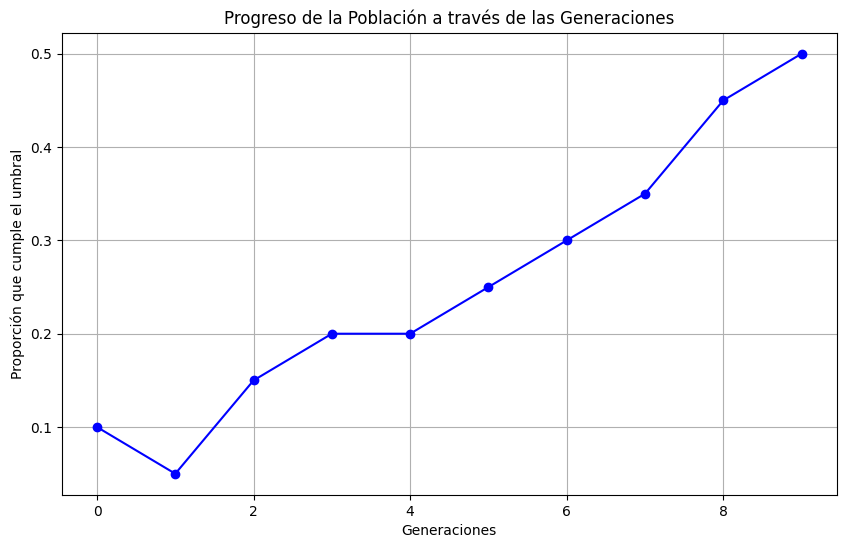

In [47]:
# Supongamos que ejecutaste condicion_paro
nueva_pob, progreso = condicion_paro(poblacion,espacio_busqueda)

# Graficar el progreso
plt.figure(figsize=(10, 6))
plt.plot(progreso, marker='o', linestyle='-', color='b')
plt.title('Progreso de la Población a través de las Generaciones')
plt.xlabel('Generaciones')
plt.ylabel('Proporción que cumple el umbral')
plt.grid(True)
plt.show()
